### 1. Get the silhouette coefficient of the two-cluster k-means solution. You'll notice that the silhouette coefficient will turn out to be greater than the one above, where the cluster number is three. You know that the iris dataset consists of three different clusters. So the silhouette score of the solution where the number of clusters is equal to the correct number of classes is actually lower than the silhouette score of the solution where the number of clusters is different from the correct number of classes. Can you explain why this is?

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, MiniBatchKMeans

import scipy
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sqlalchemy import create_engine

In [12]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

In [13]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
labels = KMeans(n_clusters=2, random_state=123).fit_predict(X_scaled)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

0.5817500491982808


It is easier for the machine to group the batches into two instead of three because there is one less variable to worry about. In our Iris data set case there are three different groups, one group is very different from the other two, so it is easier to seperate that one into its own cluster. The other two groups are more similar making it harder for the machine to seperate, the two groups are similar enough to be considered one cluster.

### 2.
Here, X will represent your features and y will hold the labels. If y is equal to 1, that indicates that the corresponding patient has heart disease. And if y is equal to 0, then the patient doesn't have heart disease.

Split the data randomly into two. Apply k-means using two, three, and four as the number of clusters, as you did when you were exploring consistency earlier in this checkpoint. Assess the consistency of the solutions using visualization. Which one seems to be the best?

Apply k-means on the whole dataset by setting k equal to 2, 3, and 4. Get the ARI score for each of them. Which model is best?

Apply k-means on the whole dataset by setting k equal to 2, 3, and 4. Get the silhouette coefficient for each of them. Which model is best?

In [51]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

In [52]:
engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

df = pd.read_sql_query("select * from heartdisease", con=engine)
engine.dispose()

In [53]:
 X = df.iloc[:, :13]
 y = df.iloc[:, 13]

 # Replace missing values (marked by `?`) with a `0`
 X = X.replace(to_replace='?', value=0)

 # Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
 y = np.where(y > 0, 0, 1)

In [55]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
sscaled_df = pd.DataFrame(X_std, columns=X.columns)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pcascaled_df = pd.DataFrame(X_pca)


c:\users\matth\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\matth\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


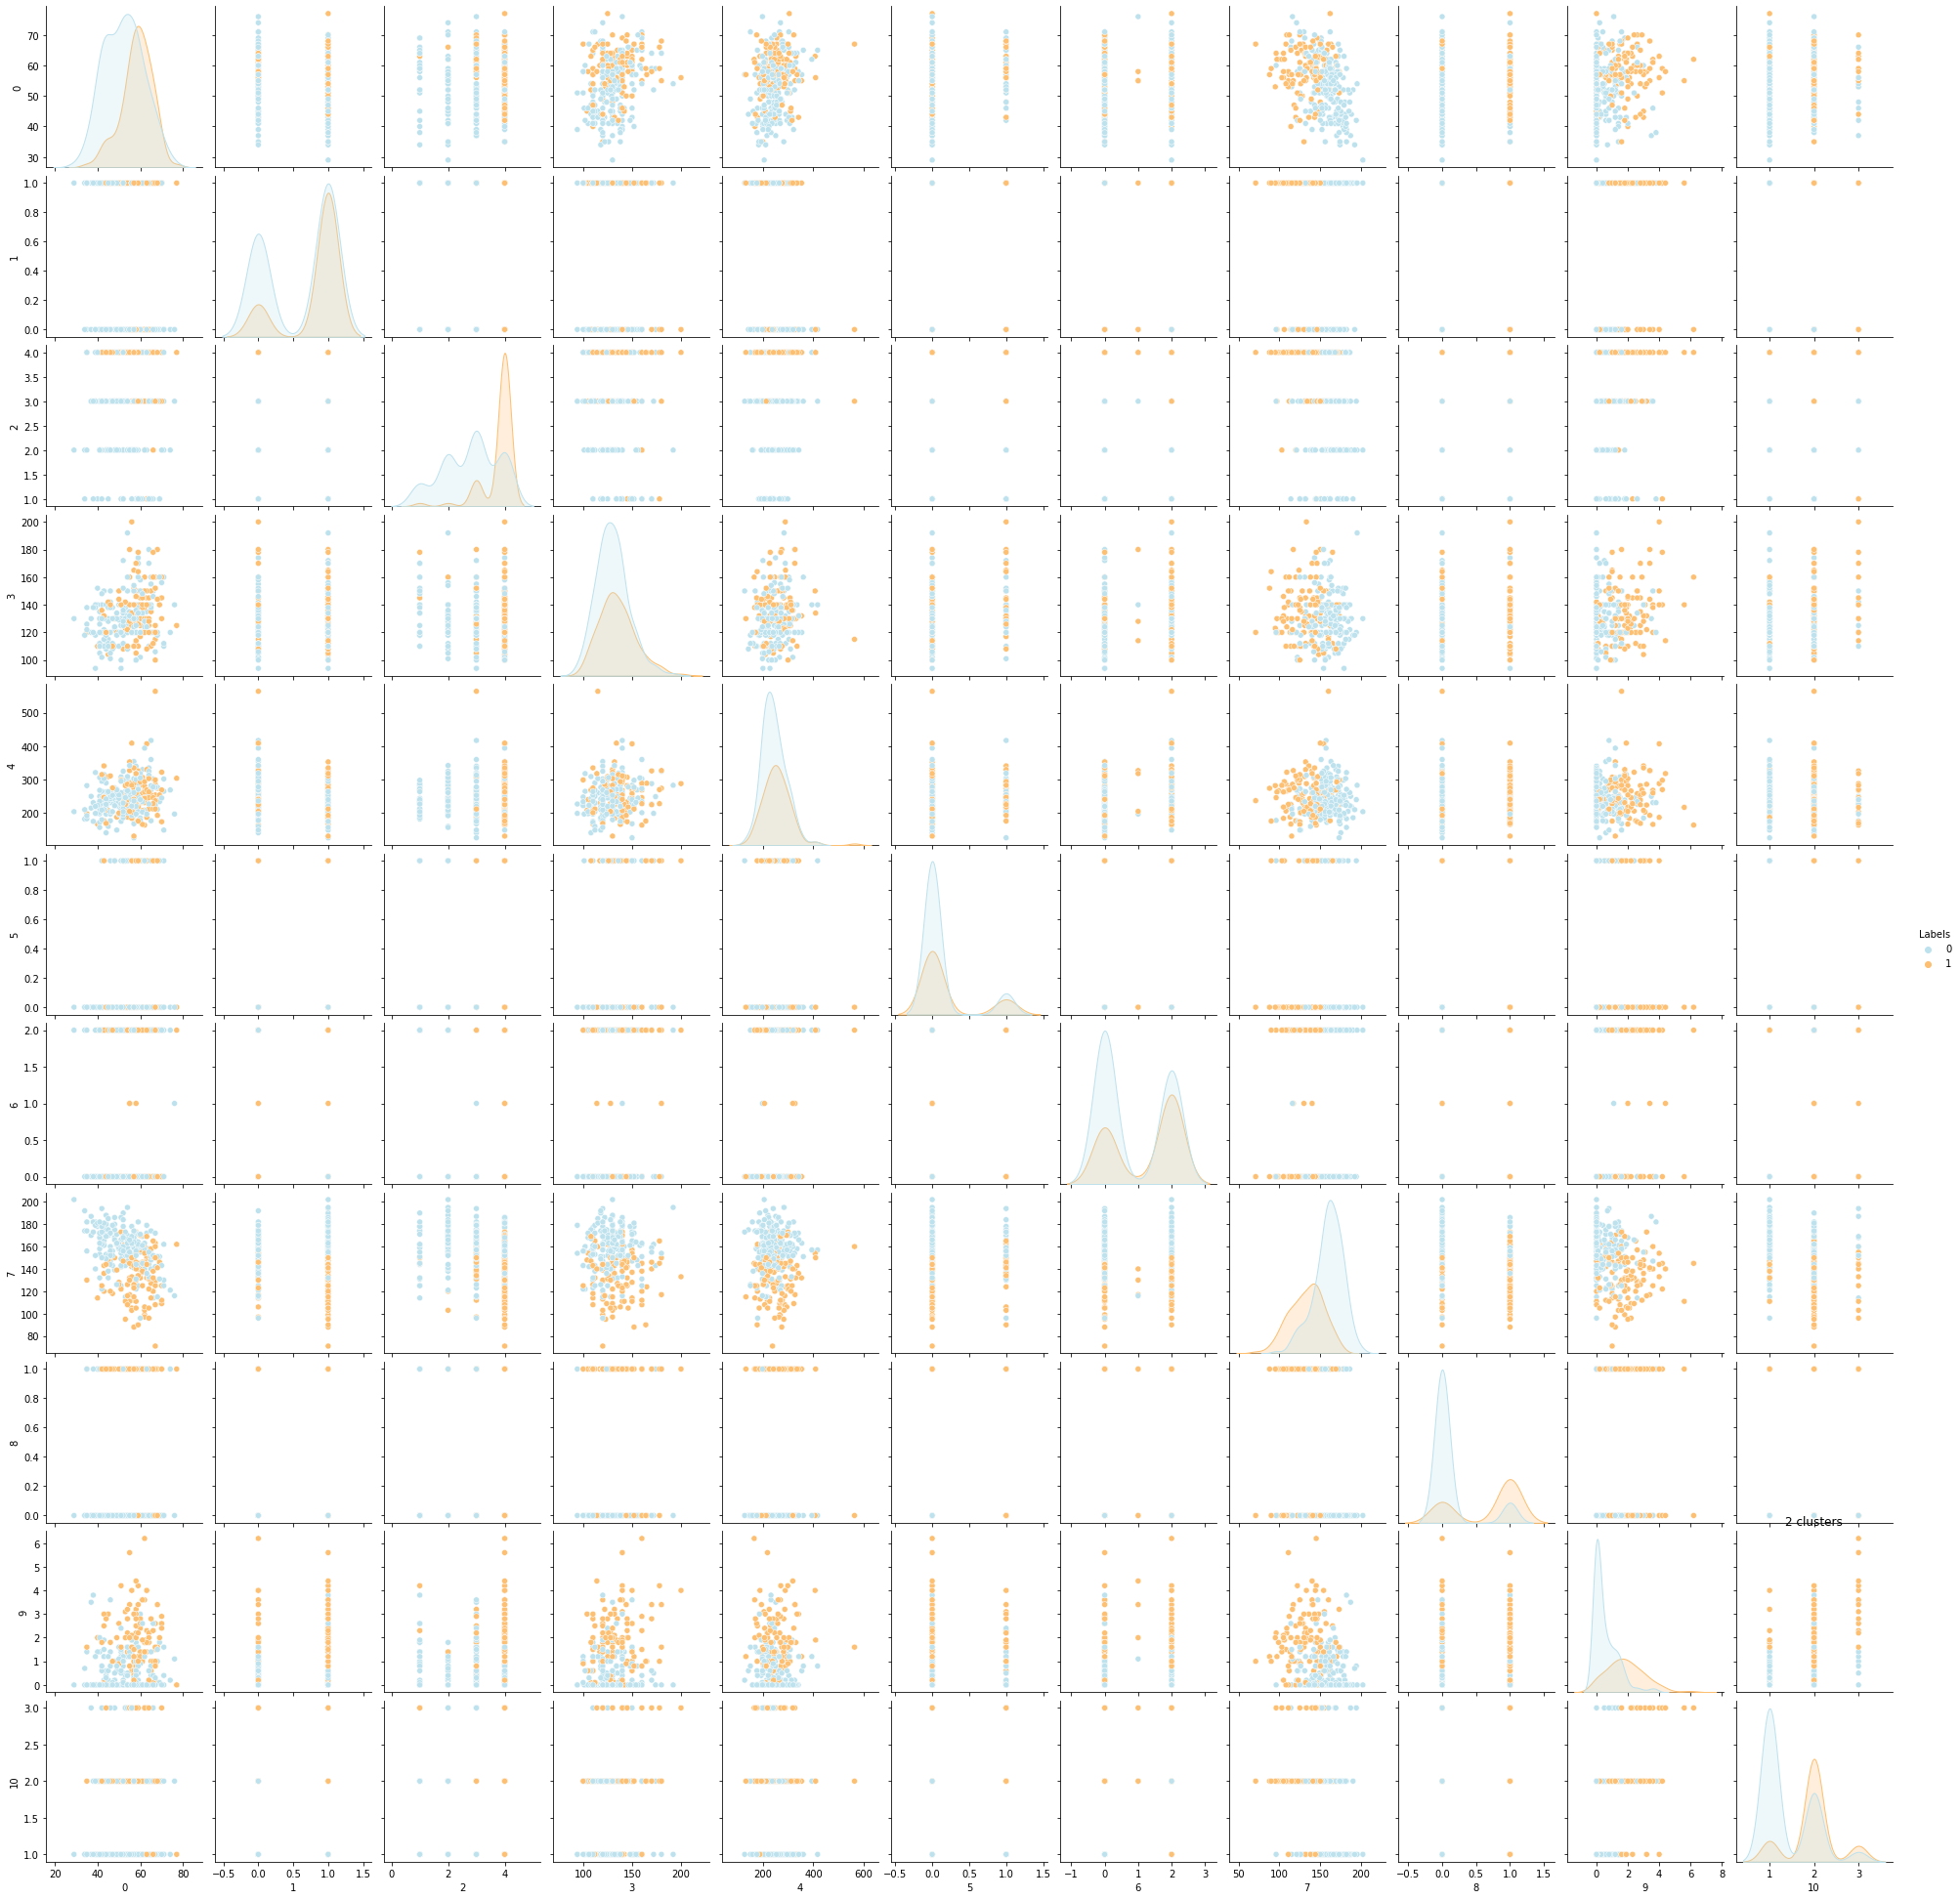

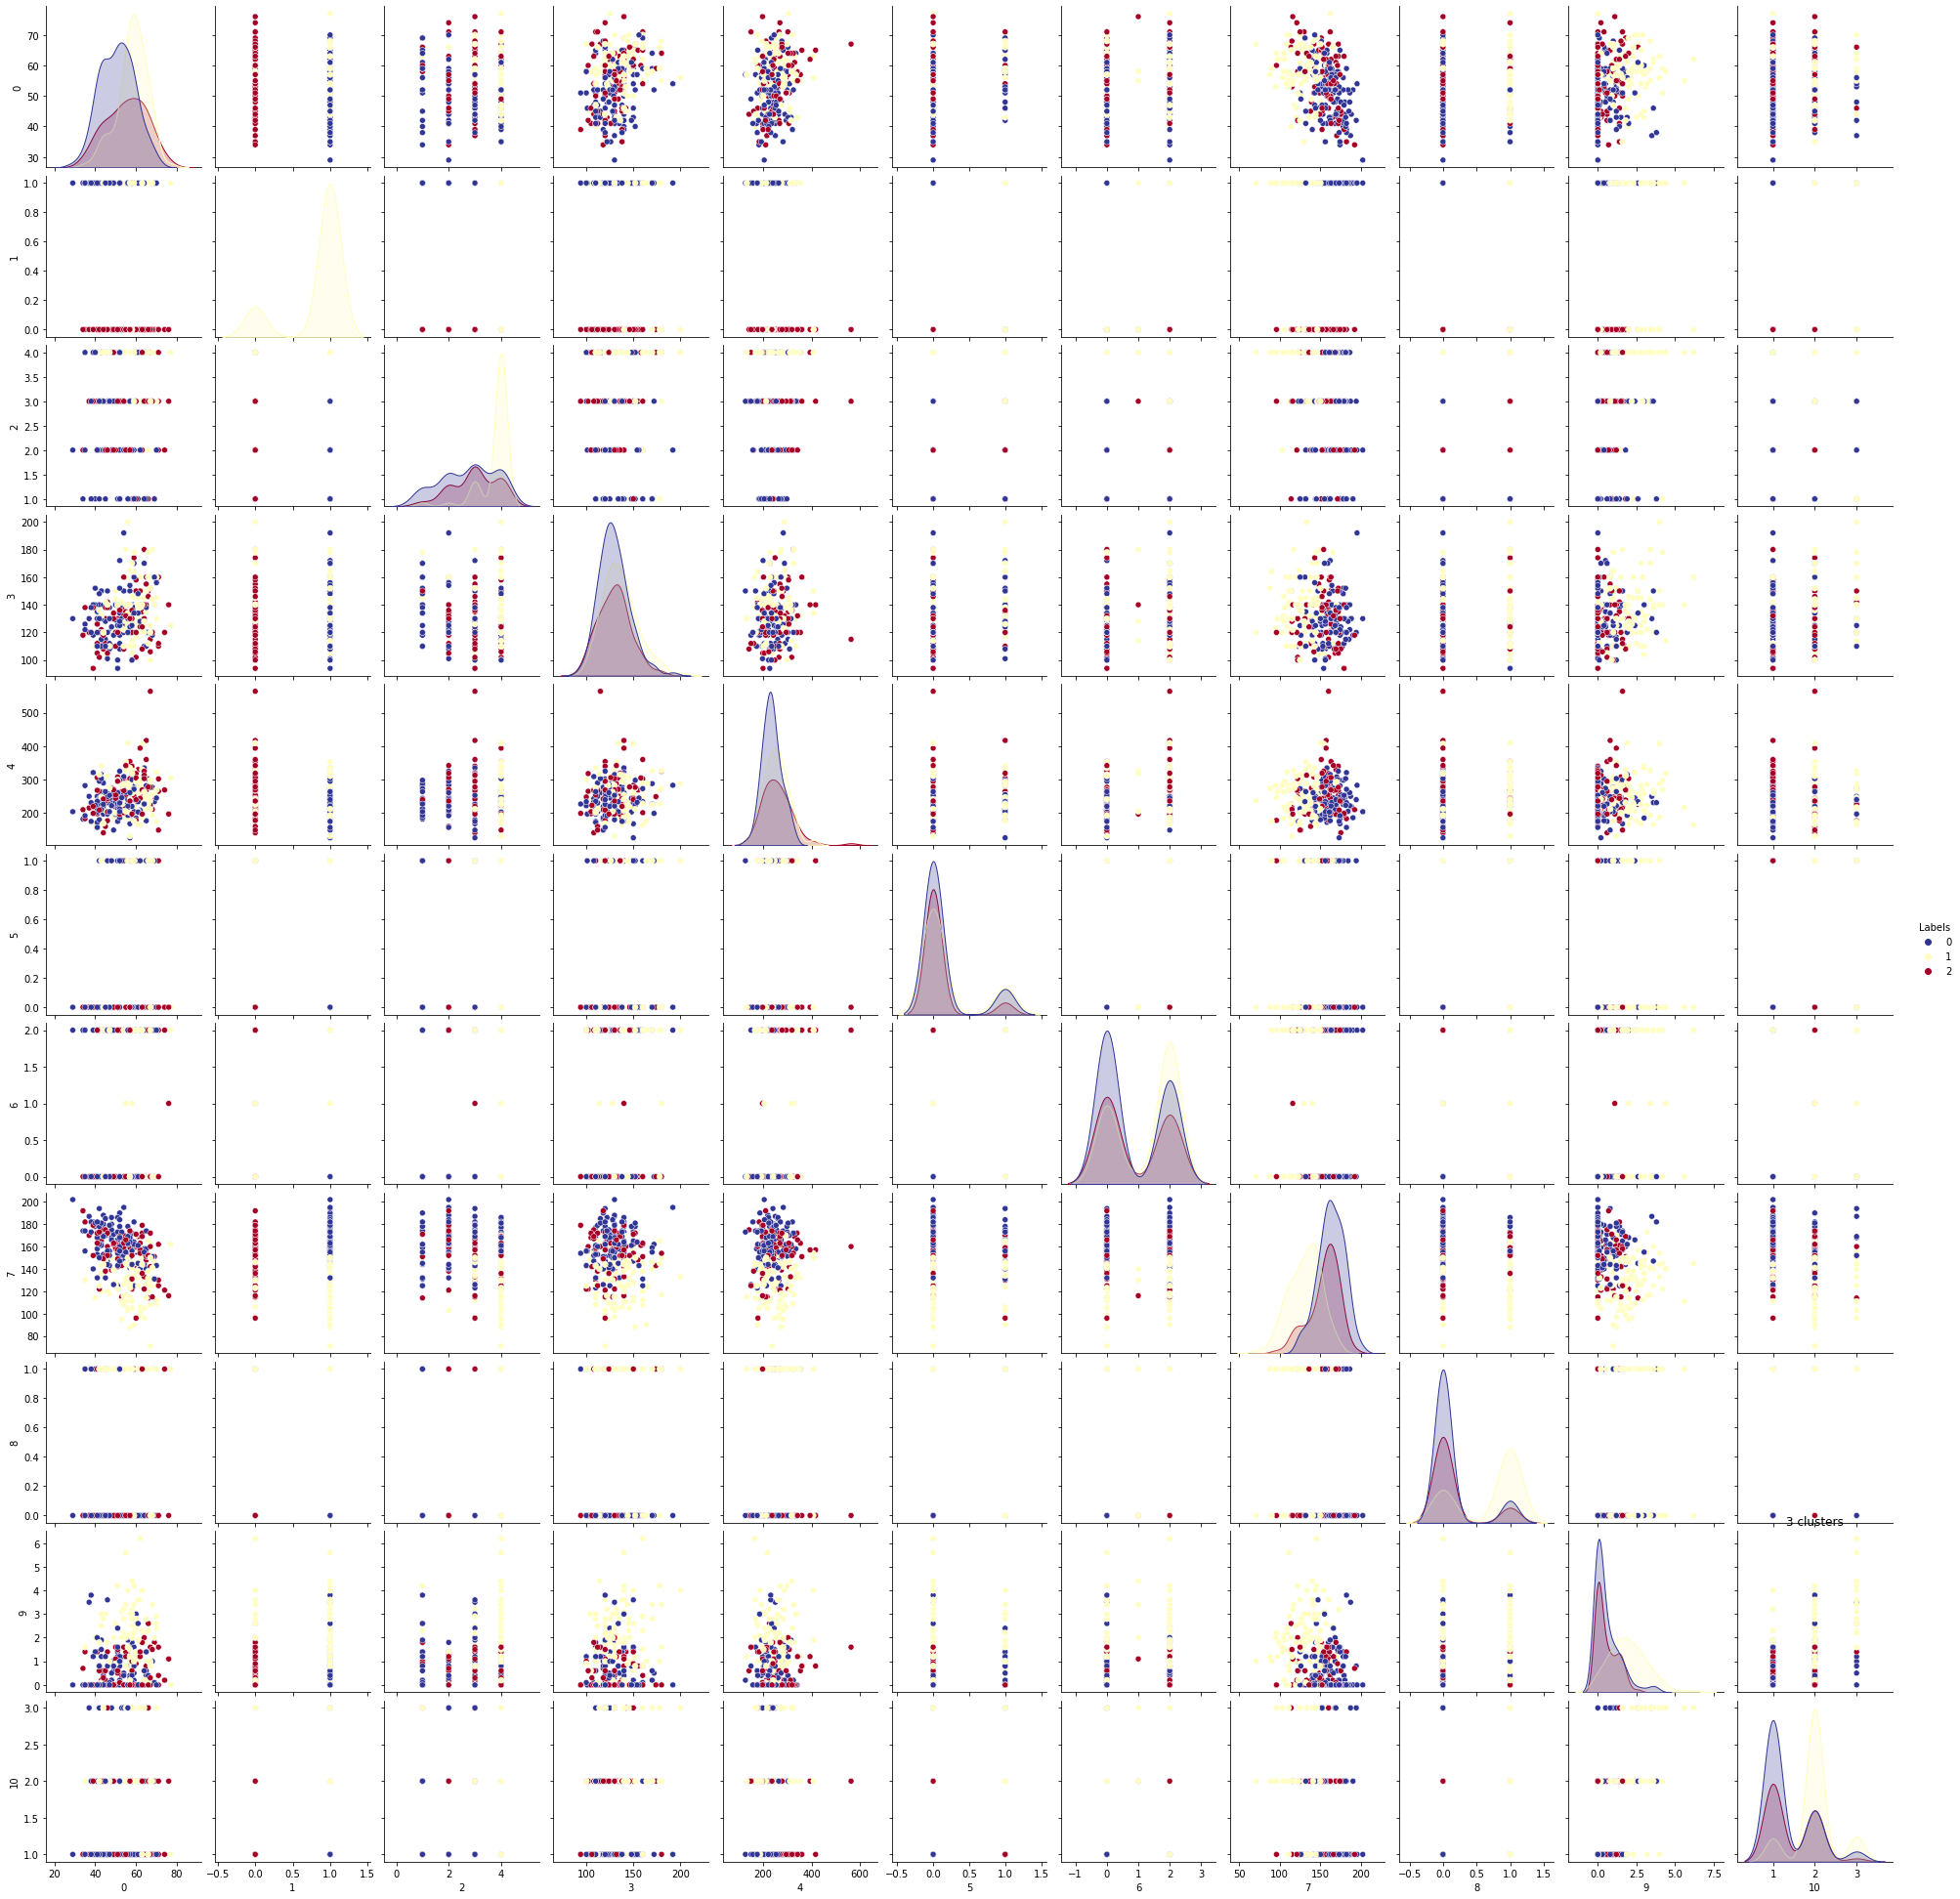

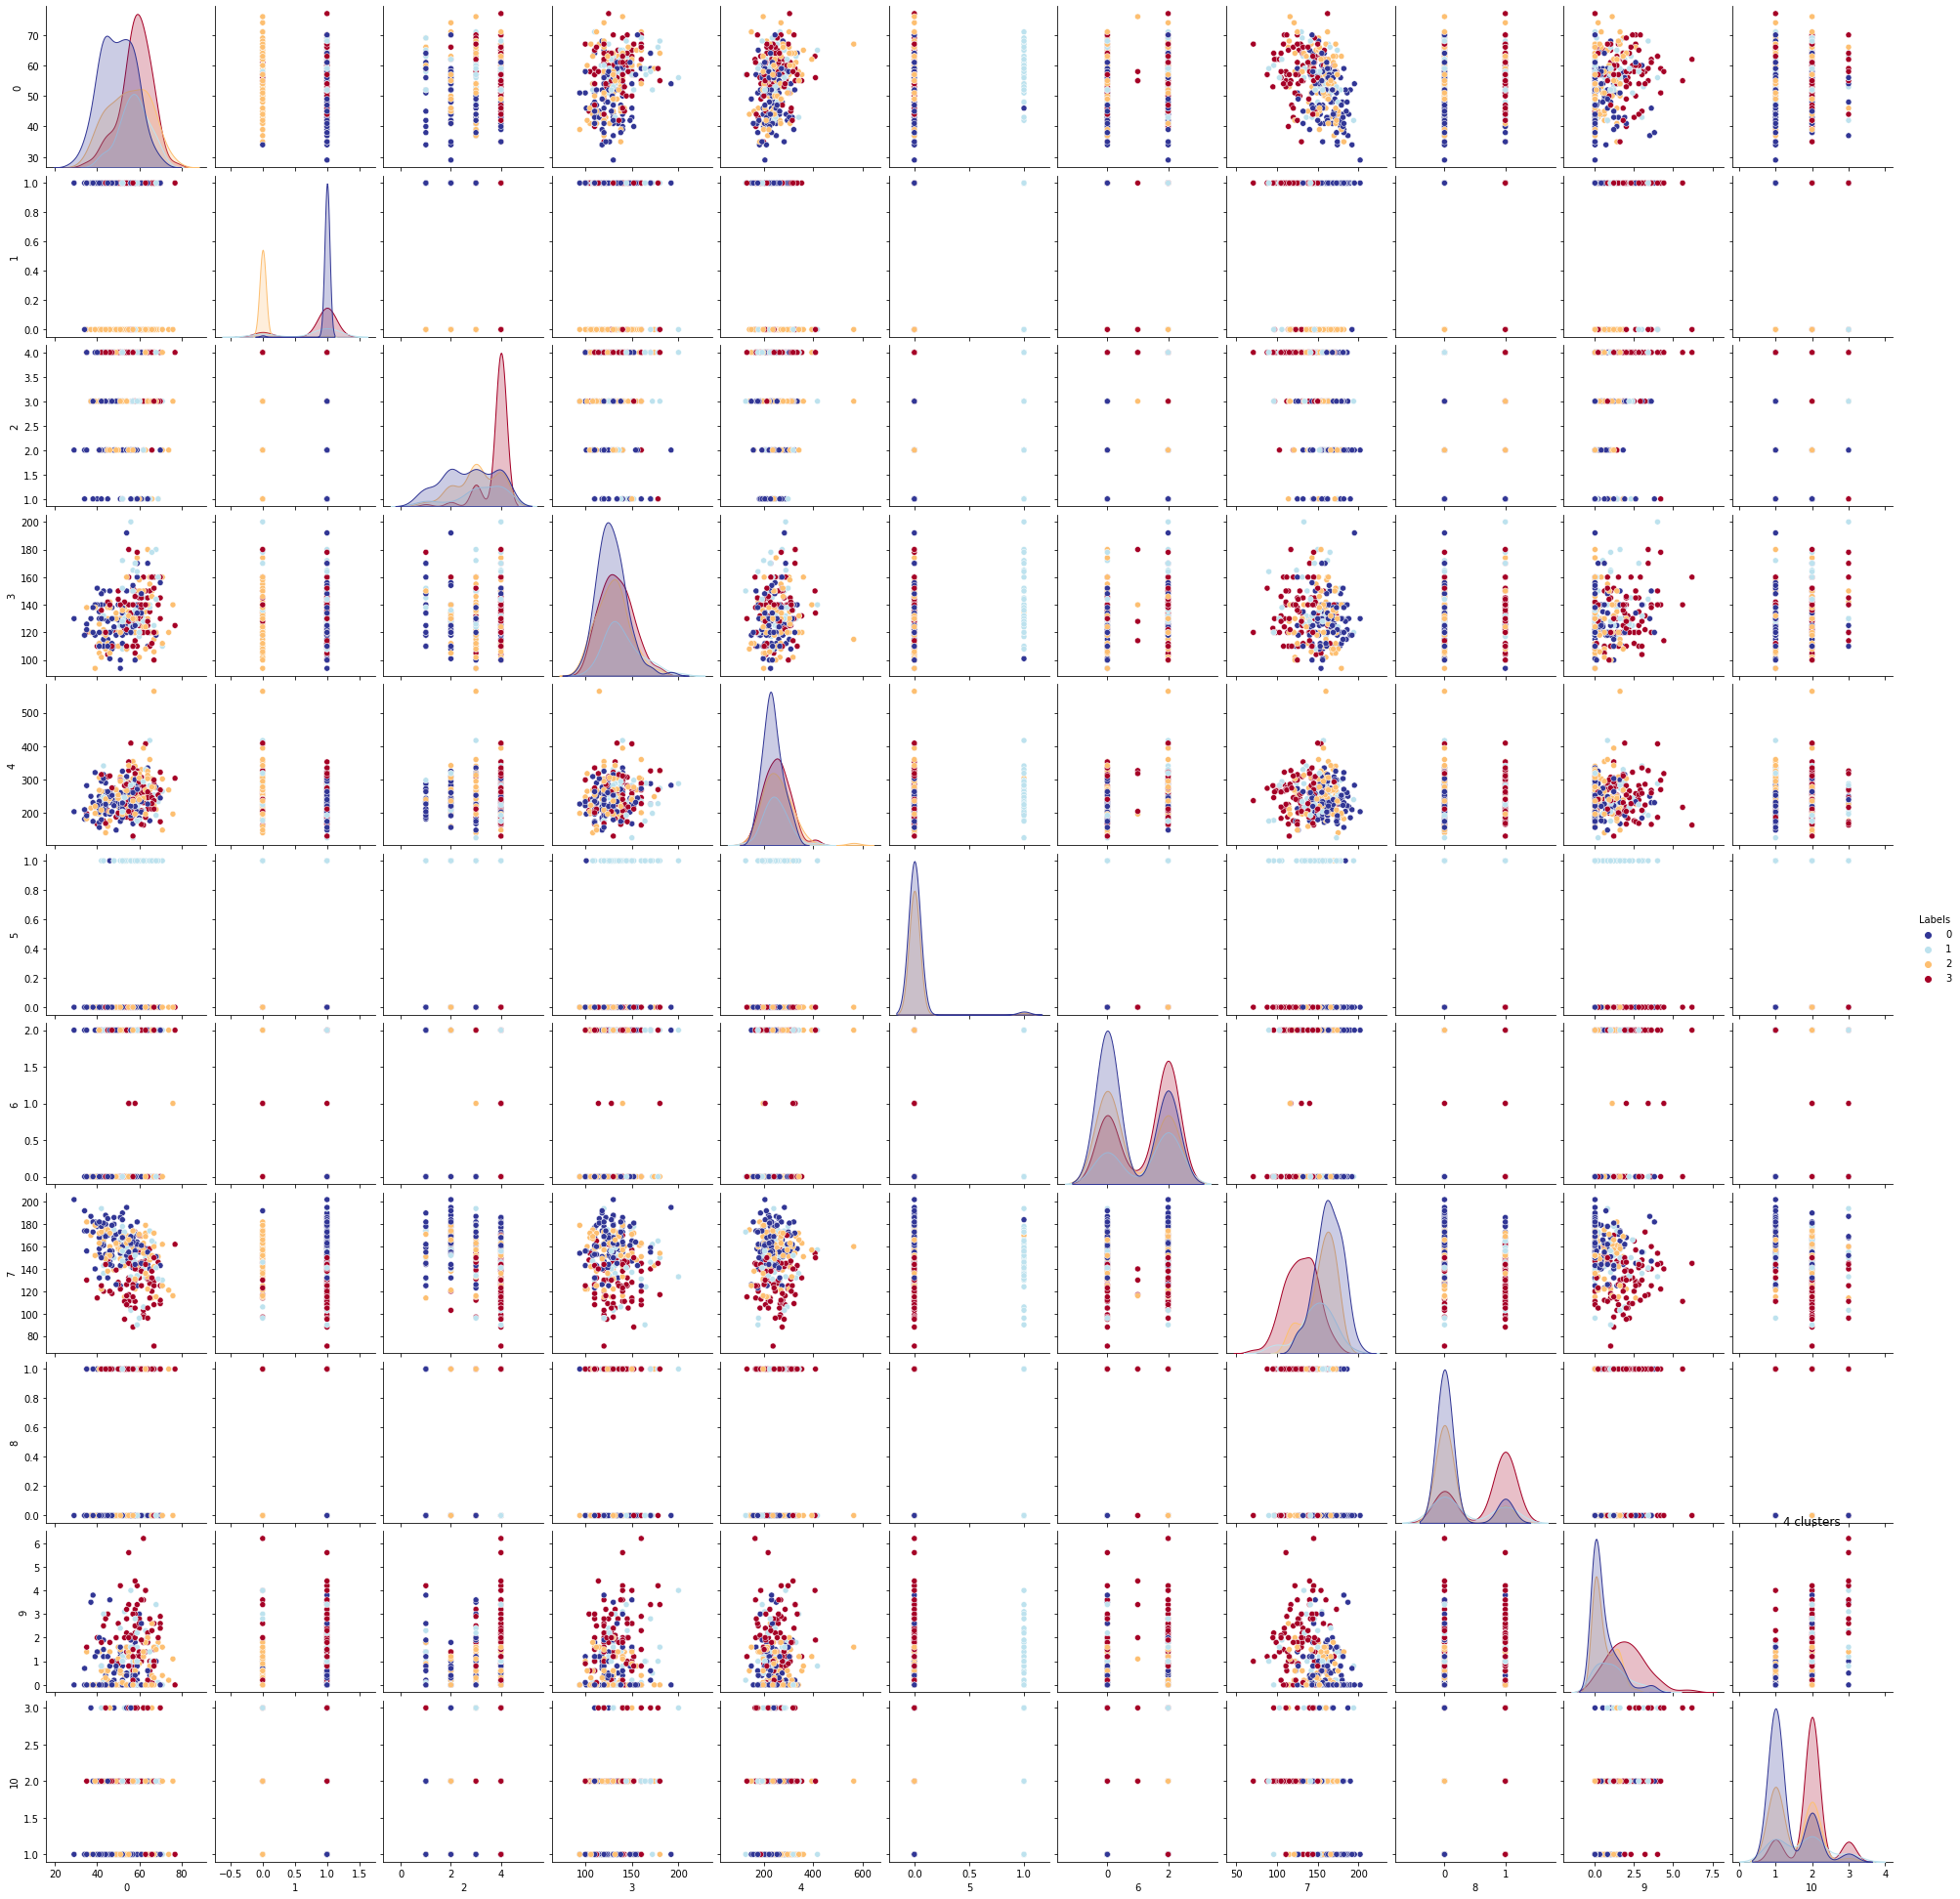

In [59]:
ks=[2,3,4]
for k in ks:
    skmeans = KMeans(n_clusters=k)
    skmeans.fit(sscaled_df)

    #kmeans.cluster_centers_
    centroids = scaler.inverse_transform(skmeans.cluster_centers_)
    centroids_df = pd.DataFrame(centroids, columns=X.columns)
    centroids_df
    X_copy = X.copy()
    X_copy["Labels"] = skmeans.labels_
    sns.pairplot(X_copy, hue="Labels", palette="RdYlBu_r")
    plt.suptitle(f'{k} clusters')

KeyboardInterrupt: 

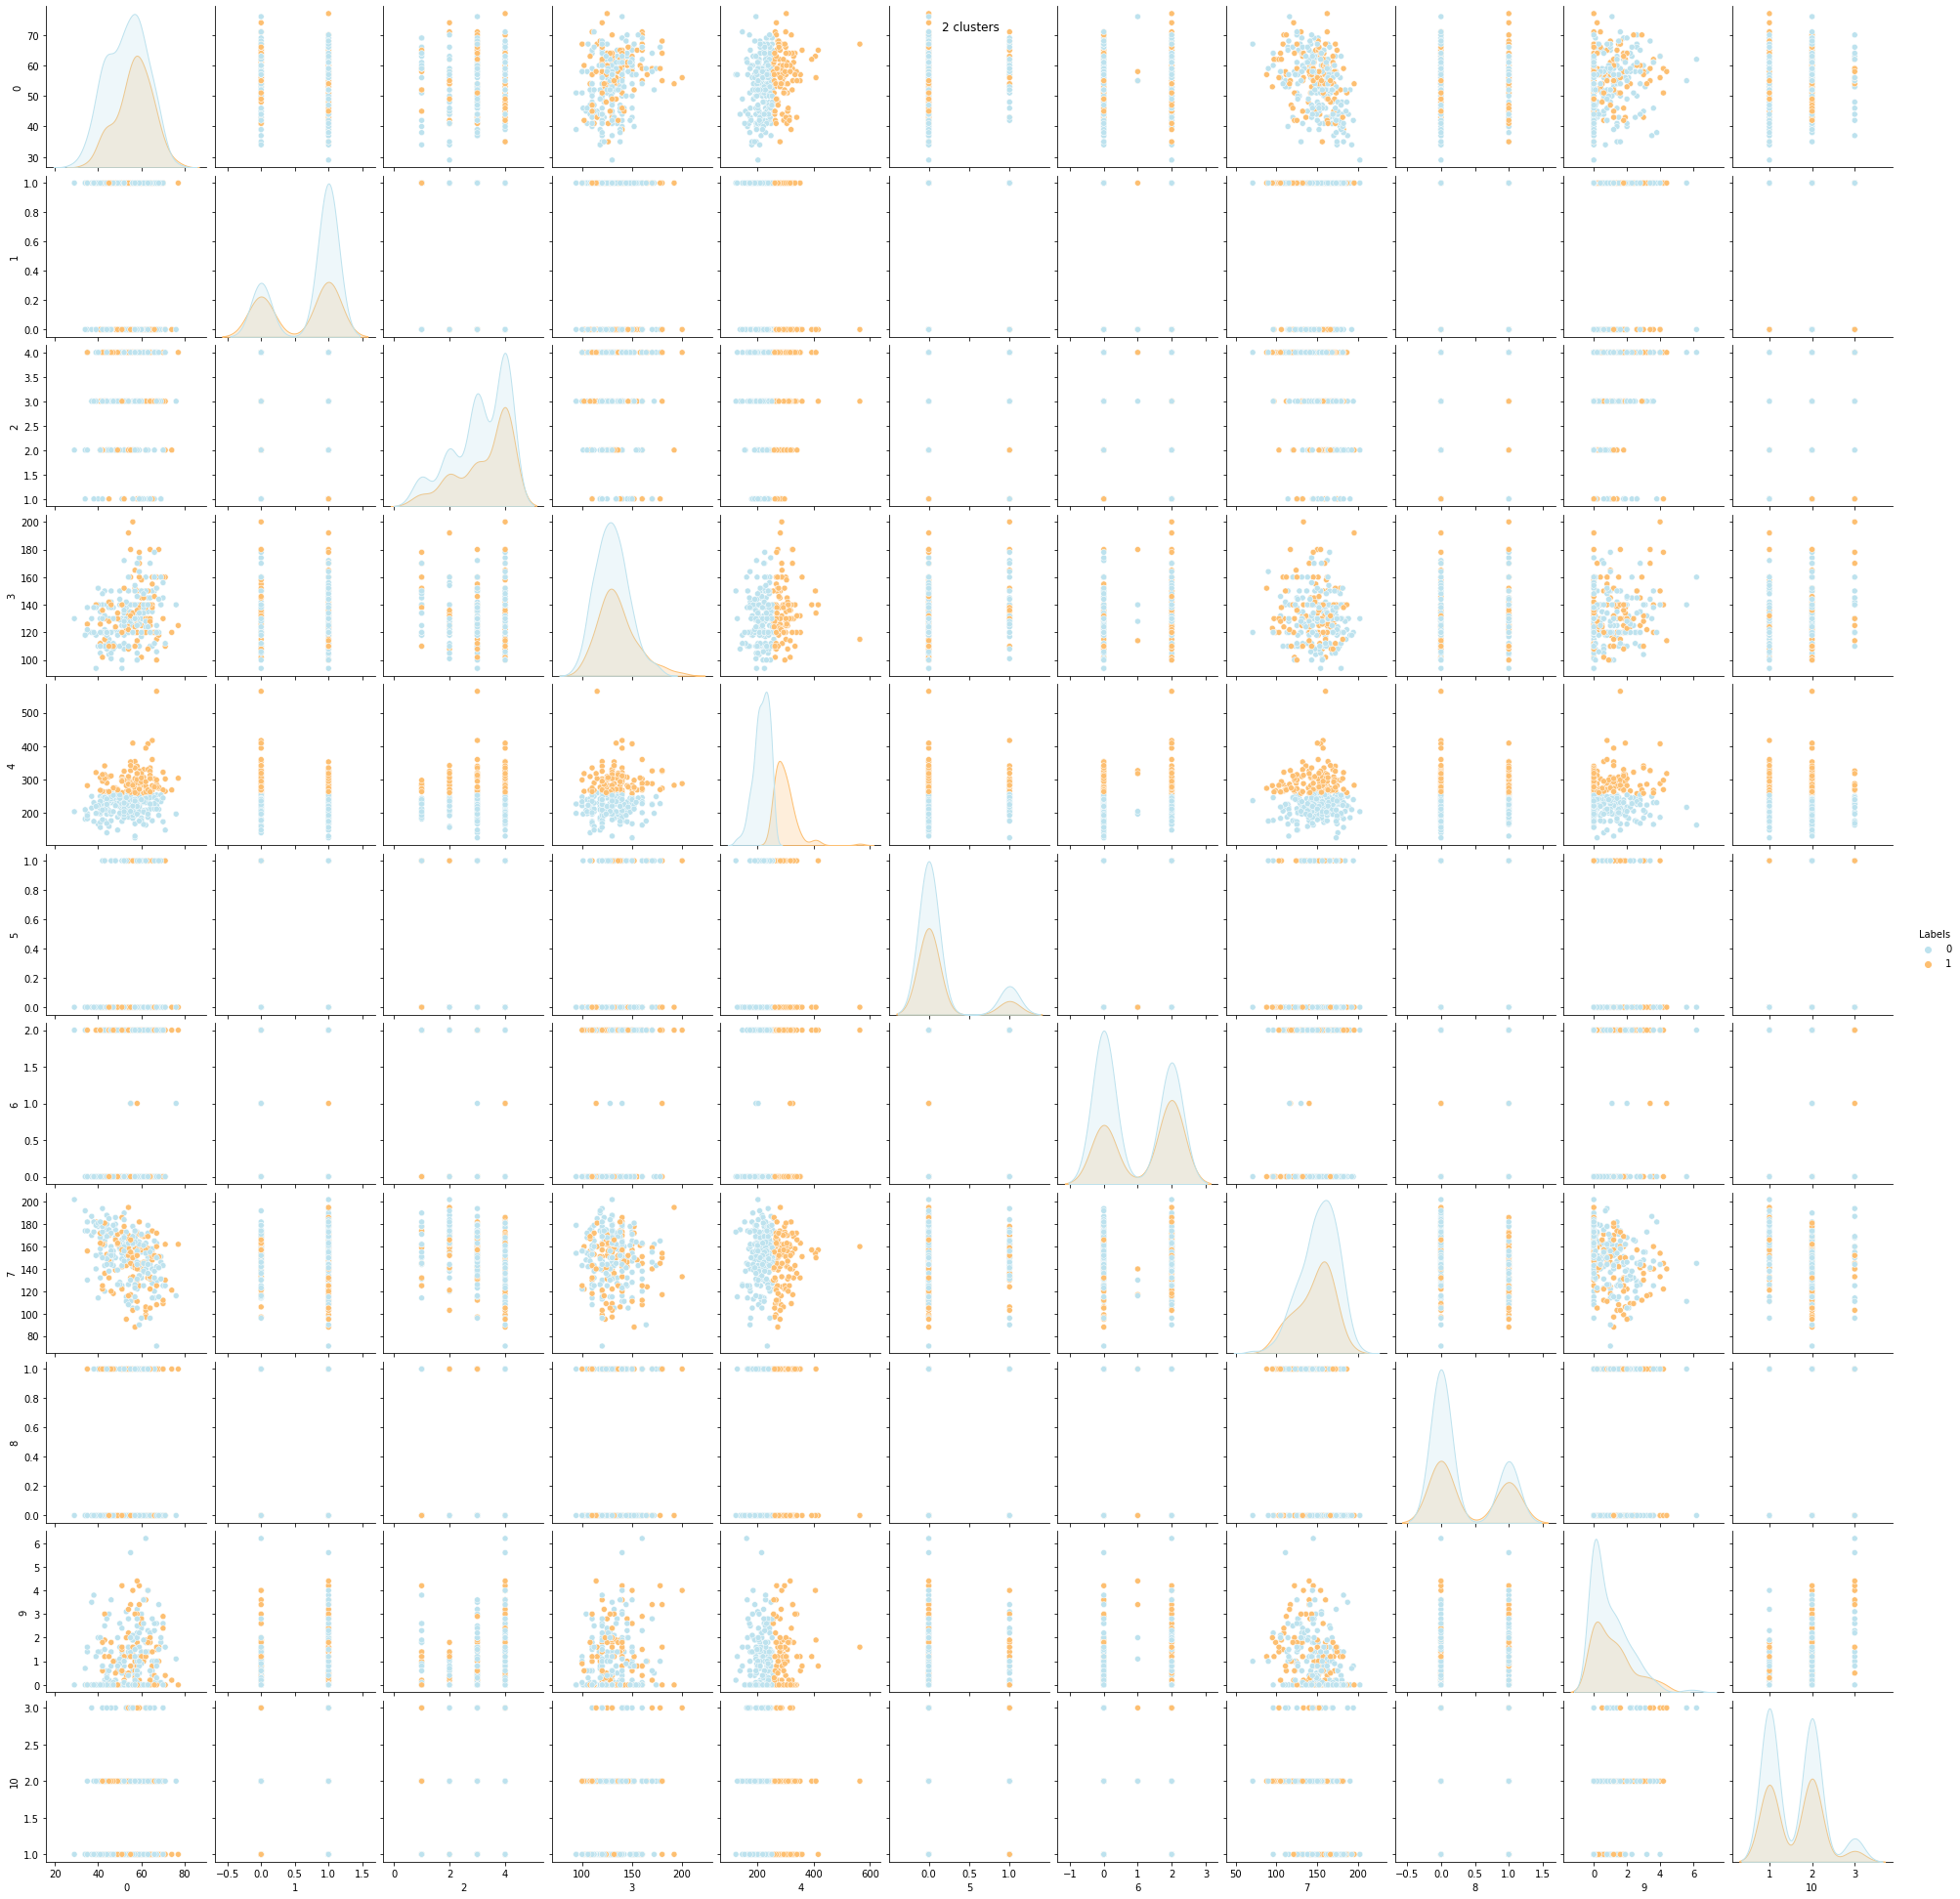

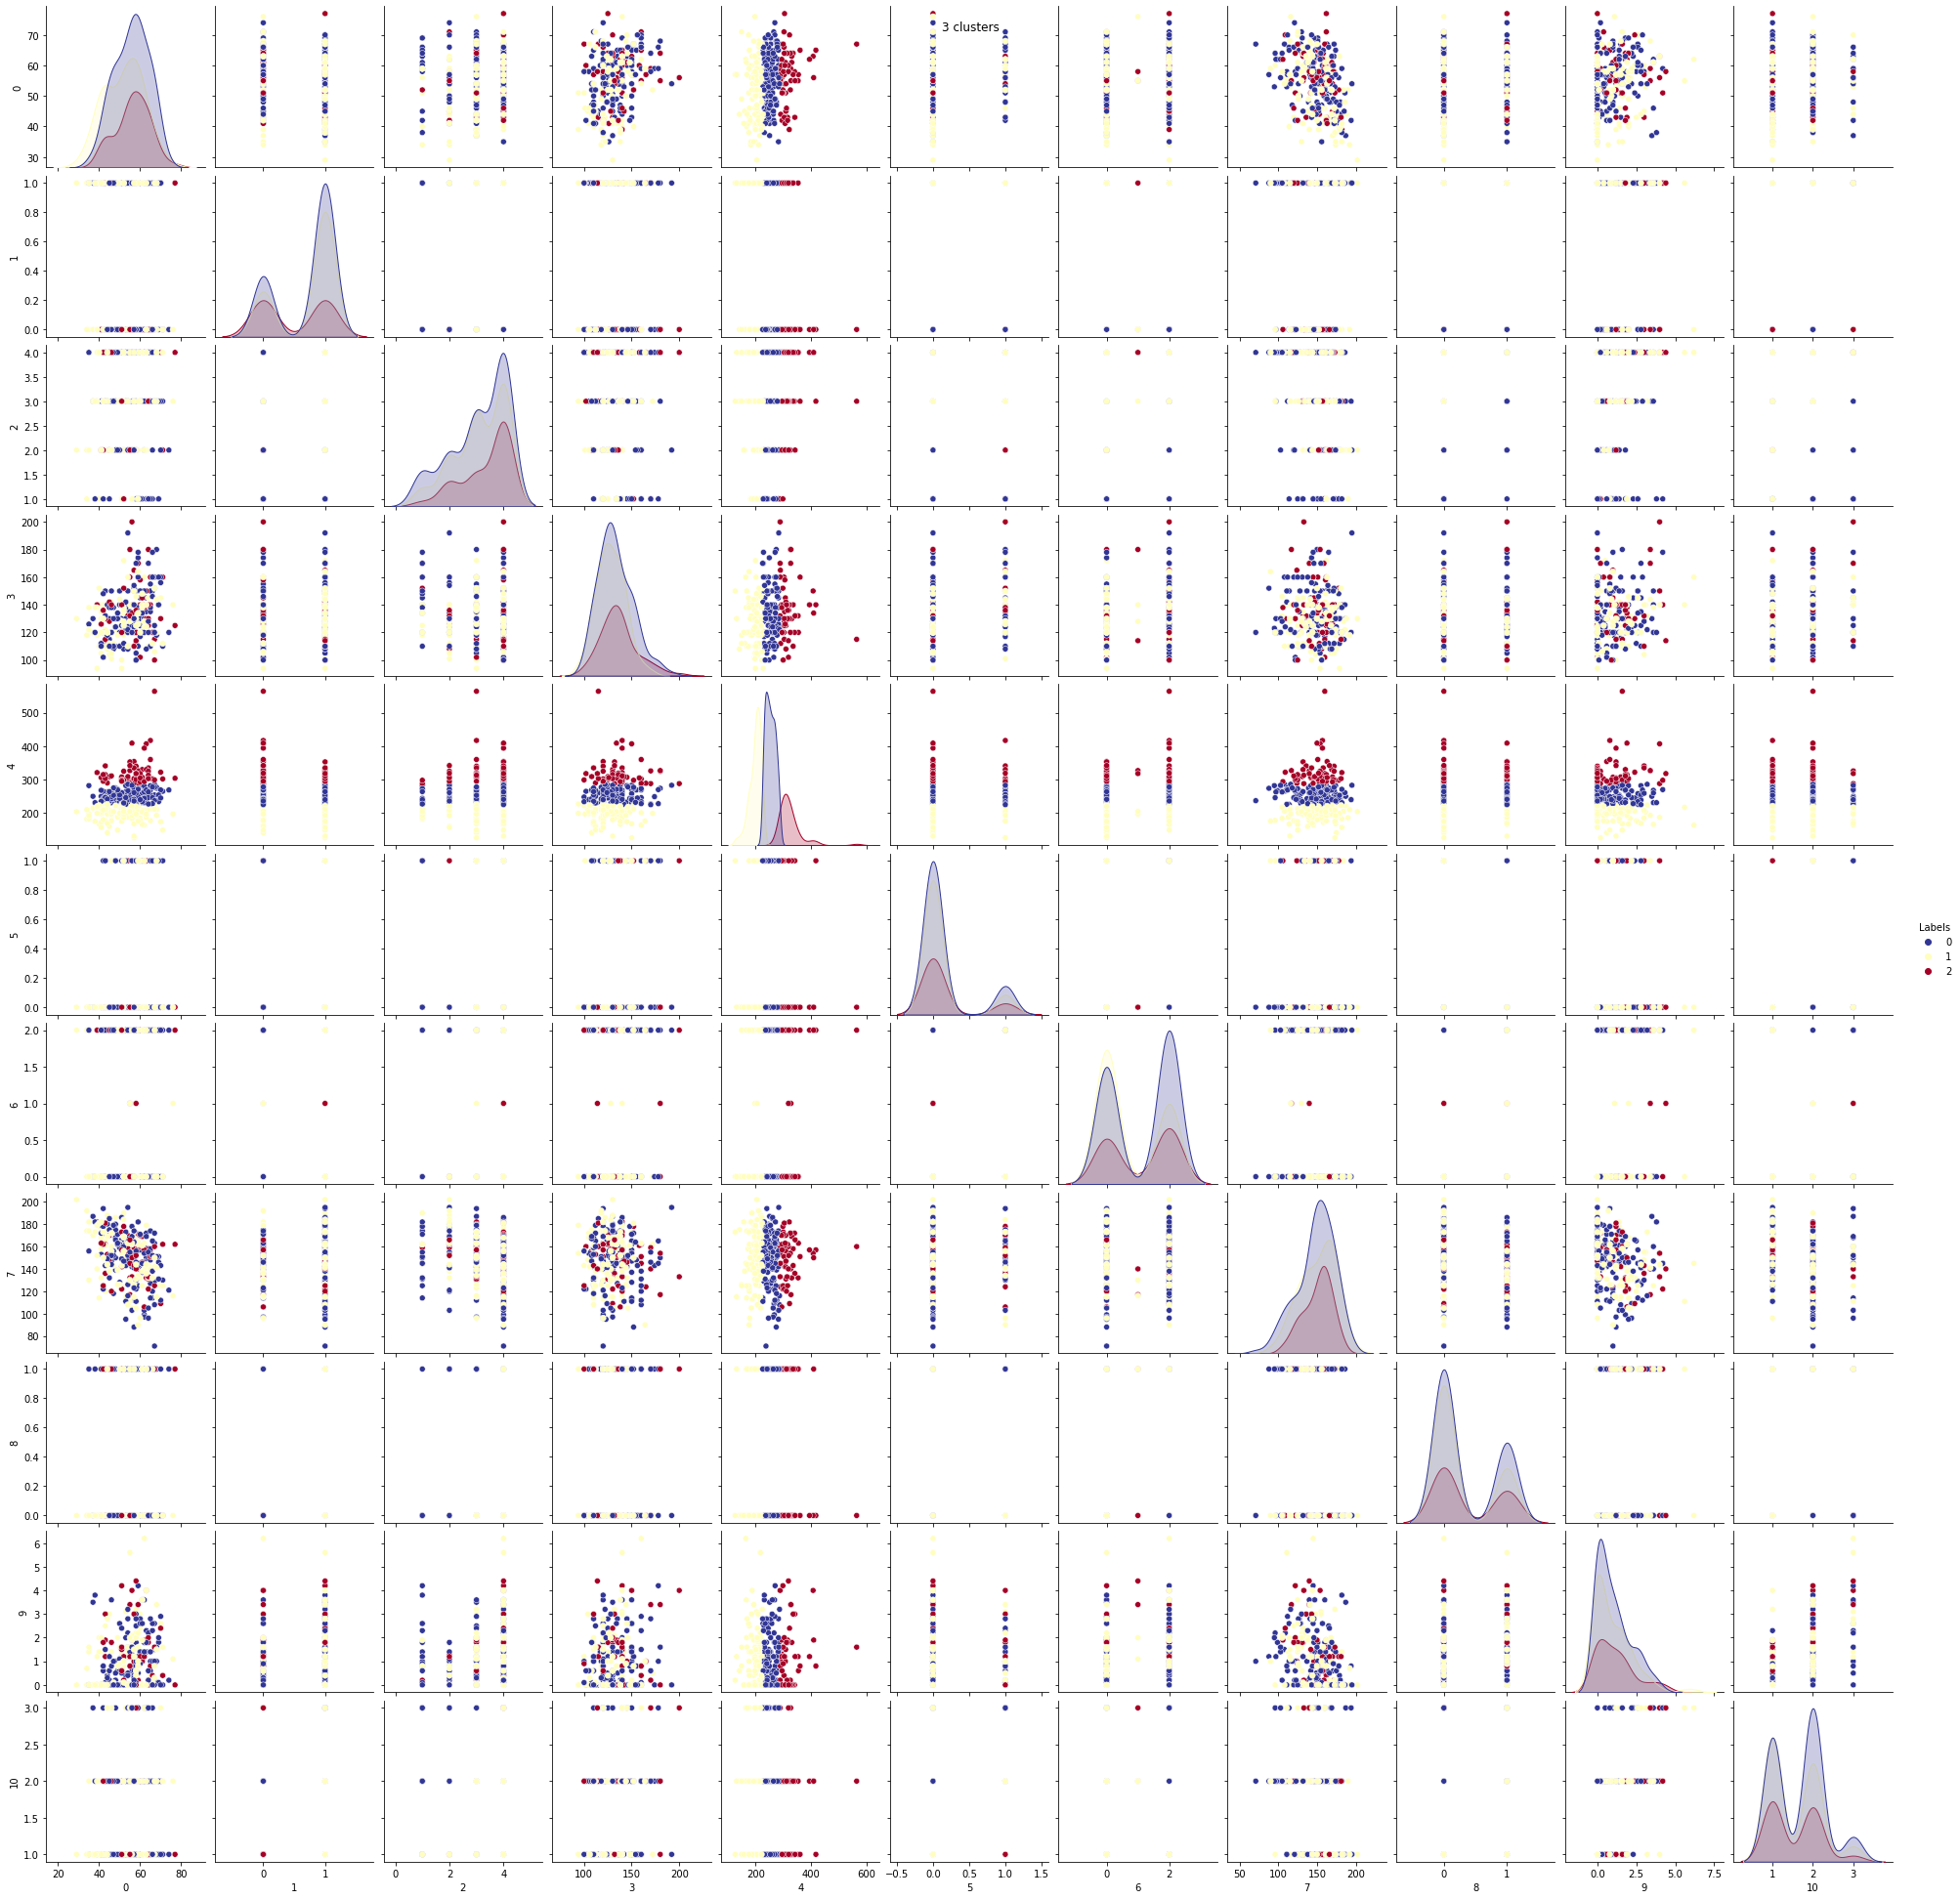

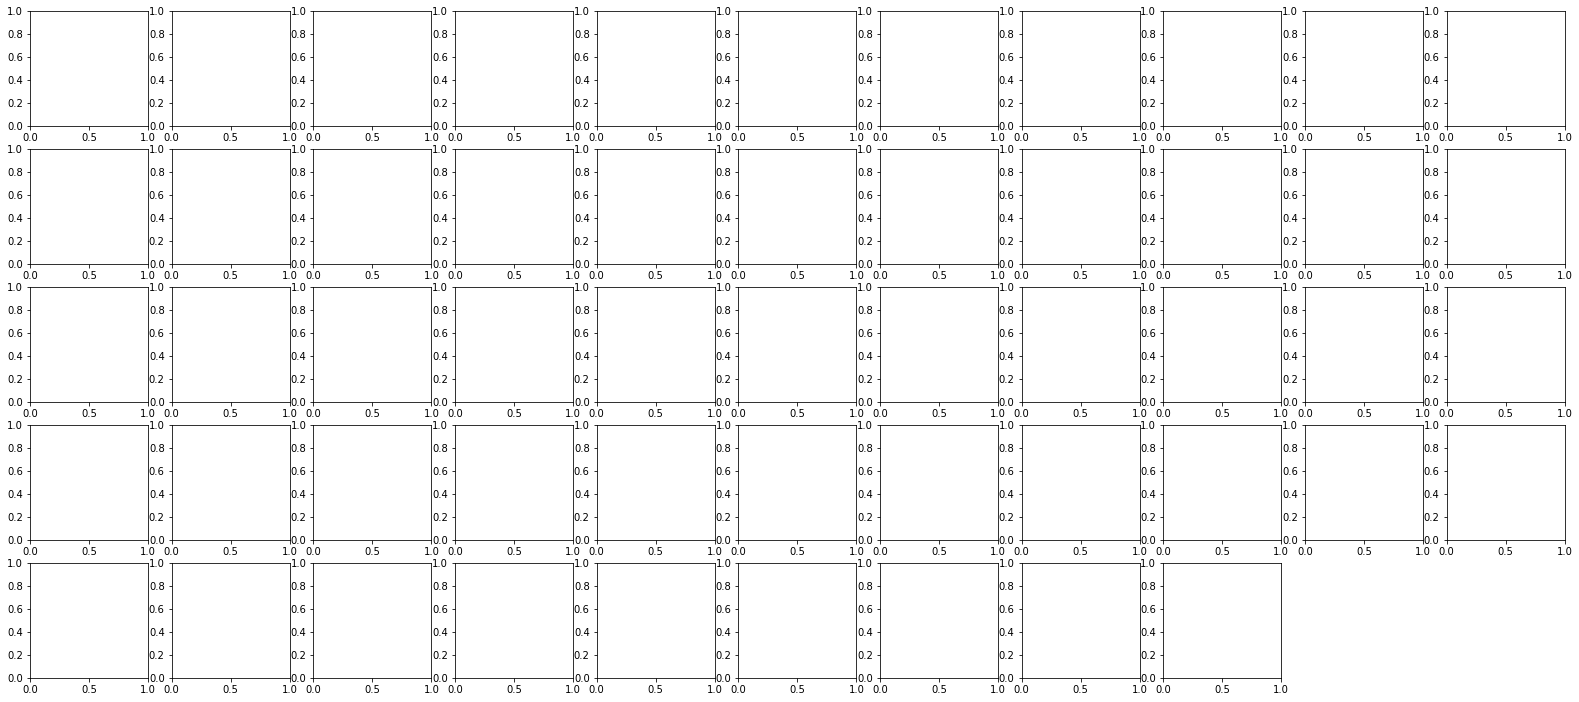

In [61]:
ks=[2,3,4]
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pcascaled_df)
    centroids = kmeans.cluster_centers_
    centroids_df = pd.DataFrame(centroids)
    centroids_df
    pca_X_copy = X.copy()
    pca_X_copy["Labels"] = kmeans.labels_
    sns.pairplot(pca_X_copy, hue="Labels", palette="RdYlBu_r")
    plt.suptitle(f'{k} clusters')

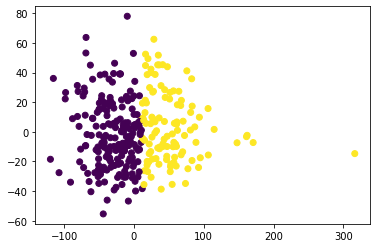

In [70]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(pcascaled_df)
y_pred = kmeans.predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

In [73]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(sscaled_df)
y_pred = kmeans.predict(X_std)
centroids = scaler.inverse_transform(skmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids)
centroids_df
pca_X_copy = X.copy()
pca_X_copy["Labels"] = kmeans.labels_
#plt.scatter(pca_X_copy[:, 0], pca_X_copy[:, 1], c=y_pred)
#plt.show()

In [77]:
pca_X_copy

0    1    2      3      4    5    6      7    8    9   10   11   12  \
0    63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   
1    67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   
2    67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   
3    37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   
4    41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   
..    ...  ...  ...    ...    ...  ...  ...    ...  ...  ...  ...  ...  ...   
298  45.0  1.0  1.0  110.0  264.0  0.0  0.0  132.0  0.0  1.2  2.0  0.0  7.0   
299  68.0  1.0  4.0  144.0  193.0  1.0  0.0  141.0  0.0  3.4  2.0  2.0  7.0   
300  57.0  1.0  4.0  130.0  131.0  0.0  0.0  115.0  1.0  1.2  2.0  1.0  7.0   
301  57.0  0.0  2.0  130.0  236.0  0.0  2.0  174.0  0.0  0.0  2.0  1.0  3.0   
302  38.0  1.0  3.0  138.0  175.0  0.0  0.0  173.0  0.0  0.0  1.0    0  3.0   

     Labels  
0         0  
1         0  
2         0  
3         1  
4         1  
..      ...  
298       1  
299       0  
300       0  
301       1  
302       1  

[303 rows x 14 columns]